## Observations and Insights 

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='inner', on=['Mouse ID'])
                          
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [226]:
# Check the number of mice.
mice = mouse_study_df['Mouse ID'].unique()
len(mice)

249

In [68]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
bad_mouse = duplicates_df['Mouse ID'].unique()[0]

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != bad_mouse, :]

In [71]:
# Check the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [ ]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [102]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'] )
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

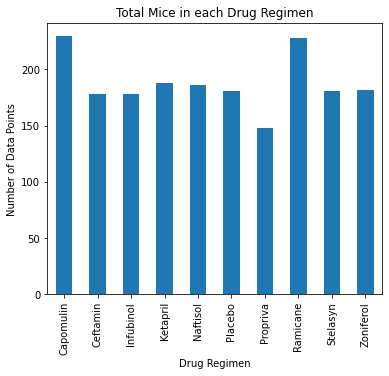

In [190]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
regimen_group = clean_df.groupby('Drug Regimen')
mice_count = regimen_group['Mouse ID'].count()

plt.title("Total Mice in each Drug Regimen")
plt.ylabel('Number of Data Points')
mice_count.plot(kind='bar', figsize=(6,5))
plt.show()


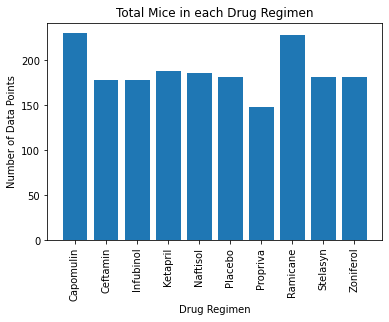

In [211]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas
x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice_count,   align='center')
plt.xticks(tick_locations, s.index, rotation='vertical')
plt.title("Total Mice in each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
# plt.figure(figsize=(6,5))
# plt.xlim(-1, len(x_axis))
# plt.ylim(0, max(mice_count + 10))
plt.show()


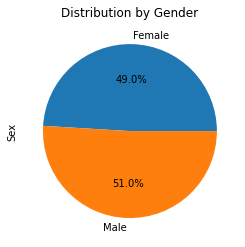

In [244]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot
gender_group = clean_df.groupby('Sex')
gender = gender_group['Sex'].count()

gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution by Gender')
plt.show()


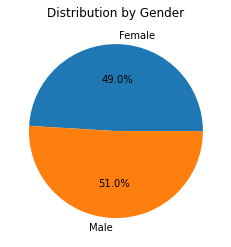

In [247]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas
labels = ['Female', 'Male']
plt.pie(gender, labels=labels, autopct='%1.1f%%')

plt.title('Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Filter rows to drug regimens of interest
focused_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') 
                       | (clean_df['Drug Regimen'] == 'Ramicane') 
                       | (clean_df['Drug Regimen'] == 'Infubinol') 
                       | (clean_df['Drug Regimen'] == 'Ceftamin'), :]
focused_df

In [229]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
mouse_group = focused_df.groupby('Mouse ID')
mice_latest_timepoint = mouse_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_latest_df = pd.merge(focused_df, mice_latest_timepoint, how='inner', on=['Mouse ID','Timepoint'])
mice_latest_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [251]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    volumes = mice_latest_df.loc[mice_latest_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol.append(volumes)
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    print(f'Drug Regimen: {drug}  IQR: {iqr}  Outliers:  {len(outliers)}')


Drug Regimen: Capomulin  IQR: 7.781863460000004  Outliers:  0
Drug Regimen: Ramicane  IQR: 9.098536719999998  Outliers:  0
Drug Regimen: Infubinol  IQR: 11.477135160000003  Outliers:  1
Drug Regimen: Ceftamin  IQR: 15.577752179999997  Outliers:  0


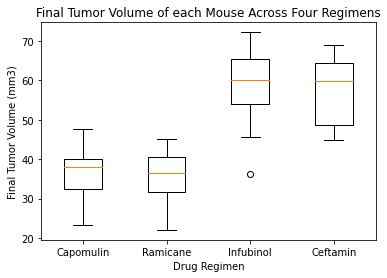

In [253]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drugs)
plt.title('Final Tumor Volume of each Mouse Across Four Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [259]:
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
cap_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [264]:
l509_df = clean_df.loc[clean_df['Mouse ID'] == 'l509', :]
l509_tumor_df = l509_df[['Tumor Volume (mm3)', 'Timepoint']]
l509_tumor_df

,Tumor Volume (mm3),Timepoint
371,45.000000,0
372,45.851193,5
373,46.759074,10
374,47.488599,15
375,48.070452,20
376,44.006257,25
377,44.708055,30
378,40.207289,35
379,40.770813,40
380,41.483008,45


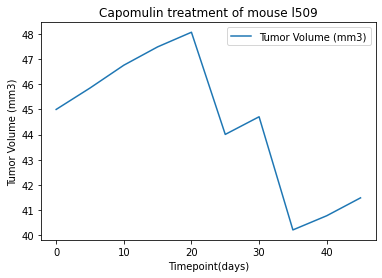

In [266]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
l509_tumor_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
